In [1]:
import pandas as pd
import seaborn as sns
sns.set_style()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('data/pulsar_data.csv')
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
df.shape

(12528, 9)

In [5]:
df.columns[df.isna().any()]

Index([' Excess kurtosis of the integrated profile',
       ' Standard deviation of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')

In [6]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [9]:
df = df.fillna(df.median(axis=0))

In [10]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.443251,1.778431,12.674758,25.604827,8.333489,104.408308,0.092034
std,25.672828,6.801077,0.992144,6.208450,29.613230,18.809291,4.535783,104.799639,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.421239,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [11]:
df.to_csv('data/preprocessed.csv')

# Everything below here is just testing

In [12]:
X = df[df.columns[:-1]].to_numpy()
X

array([[ 1.21156250e+02,  4.83729711e+01,  3.75484665e-01, ...,
         1.83993666e+01,  7.44987415e+00,  6.51592977e+01],
       [ 7.69687500e+01,  3.61755566e+01,  7.12897860e-01, ...,
         1.75709969e+01,  9.41465226e+00,  1.02722975e+02],
       [ 1.30585938e+02,  5.32295335e+01,  1.33408289e-01, ...,
         2.23625530e+01,  8.50836378e+00,  7.40313242e+01],
       ...,
       [ 1.16031250e+02,  4.32138464e+01,  6.63455691e-01, ...,
         1.16281494e+01,  1.70552145e+01,  3.12204325e+02],
       [ 1.35664062e+02,  4.99337494e+01, -8.99403060e-02, ...,
         2.15015050e+01,  7.39839490e+00,  6.23340175e+01],
       [ 1.20726562e+02,  5.04722564e+01,  3.46178079e-01, ...,
         1.17926025e+01,  1.76622219e+01,  3.29548016e+02]])

In [30]:
y = df['target_class'].to_numpy()
y

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
X_scaled = scale(X)
X_scaled

array([[ 0.39398903,  0.27225212, -0.06830557, ..., -0.38309513,
        -0.19481754, -0.3745297 ],
       [-1.32725743, -1.52127273,  0.27179307, ..., -0.42713733,
         0.23837256, -0.01608212],
       [ 0.76130595,  0.98636783, -0.31230861, ..., -0.17238306,
         0.038556  , -0.28986928],
       ...,
       [ 0.19435365, -0.48635278,  0.22195739, ..., -0.74310271,
         1.92294752,  1.98287239],
       [ 0.95911539,  0.50175114, -0.53743481, ..., -0.21816269,
        -0.20616758, -0.40148965],
       [ 0.37725131,  0.58093396, -0.0978454 , ..., -0.73435917,
         2.05677923,  2.14837279]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)
X_train.shape

(9396, 8)

In [16]:
cs = [10**x for x in range(-2, 4)]
scores = []
for c in cs:
    svc = SVC(C=c, random_state=42)
    svc.fit(X_train, y_train)
    scores.append(svc.score(X_test, y_test))
scores

[0.9648786717752235,
 0.9776500638569604,
 0.979565772669221,
 0.9818007662835249,
 0.9798850574712644,
 0.9786079182630907]

In [17]:
cs

[0.01, 0.1, 1, 10, 100, 1000]

In [18]:
scores = []
for c in range(1, 11):
    svc = SVC(C=c, random_state=42)
    svc.fit(X_train, y_train)
    scores.append(svc.score(X_test, y_test))
scores

[0.979565772669221,
 0.9805236270753512,
 0.981162196679438,
 0.9821200510855683,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9818007662835249]

In [19]:
degrees = list(range(0, 7))
scores = []
for degree in degrees:
    svc = SVC(degree=degree, random_state=42)
    svc.fit(X_train, y_train)
    scores.append(svc.score(X_test, y_test))
scores

[0.979565772669221,
 0.979565772669221,
 0.979565772669221,
 0.979565772669221,
 0.979565772669221,
 0.979565772669221,
 0.979565772669221]

In [20]:
gammas = [10**x for x in range(-2, 3)]
scores = []
for gamma in gammas:
    svc = SVC(gamma=gamma, random_state=42)
    svc.fit(X_train, y_train)
    scores.append(svc.score(X_test, y_test))
scores

[0.9757343550446999,
 0.9792464878671775,
 0.9808429118773946,
 0.9189016602809706,
 0.9080459770114943]

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf  # or import torch if you are using PyTorch


2024-01-18 14:01:10.361321: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 14:01:10.361371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 14:01:10.392997: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 14:01:10.477393: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-18 14:01:11.955276: W tensorflow/compiler/tf2

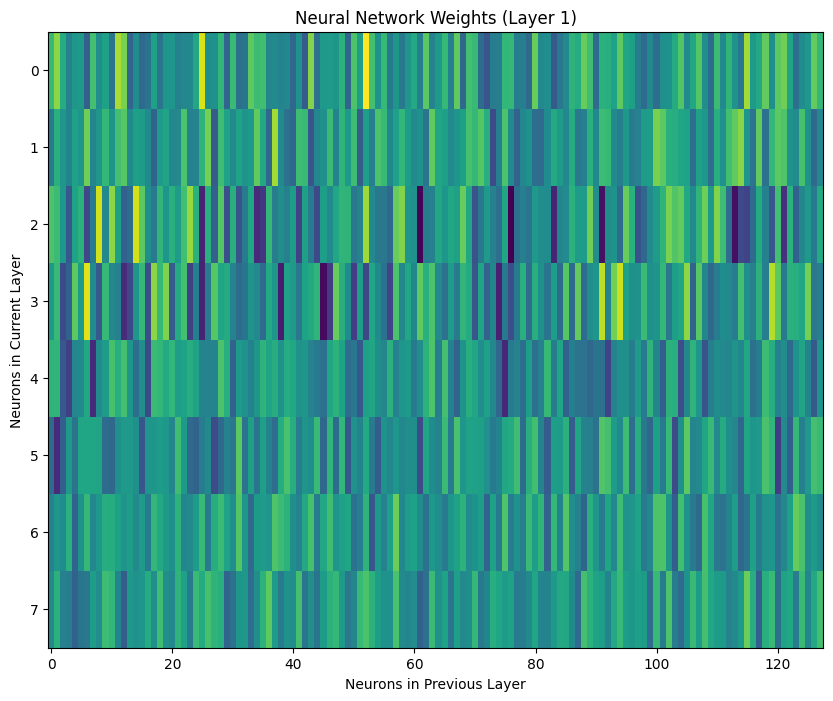

In [23]:
import matplotlib.pyplot as plt
# Create and train a simple MLP classifier
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Visualize the topology
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(model.coefs_[0], cmap='viridis', aspect='auto')
ax.set_title('Neural Network Weights (Layer 1)')
ax.set_xlabel('Neurons in Previous Layer')
ax.set_ylabel('Neurons in Current Layer')
plt.show()

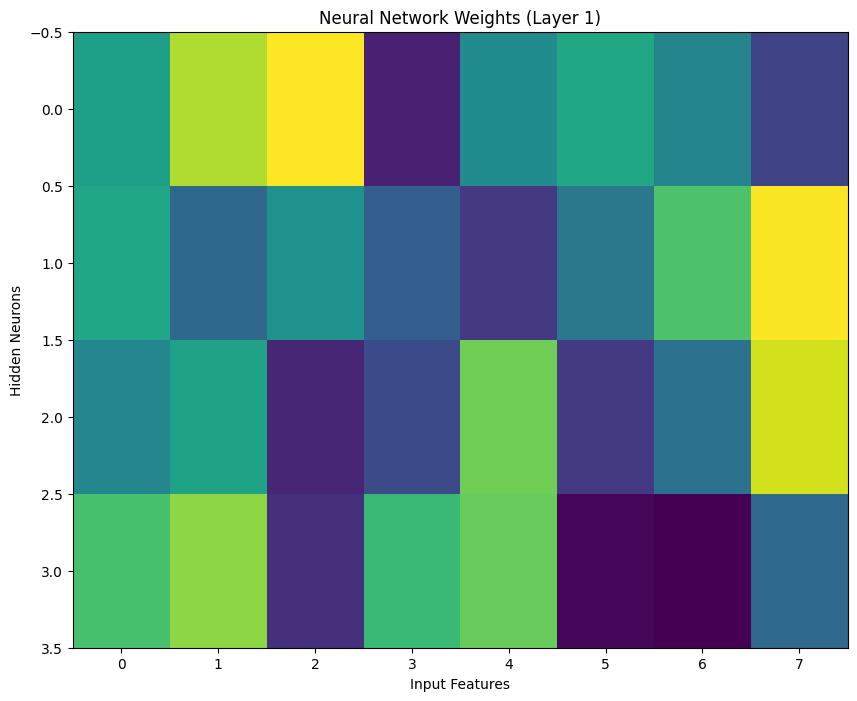

In [24]:
import numpy as np
import torch
import torch.nn as nn
from torchviz import make_dot
import matplotlib.pyplot as plt


class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return x

# Create an instance of the neural network
input_size = 8
hidden_size = 4
output_size = 1
model = NeuralNetwork(input_size, hidden_size, output_size)

# Visualize the computation graph (topology)
x = torch.from_numpy(X_train.astype(np.float32))
#make_dot(y, params=dict(model.named_parameters())).render("model_topology", format="png")
dot = make_dot(model(x), params=dict(model.named_parameters()))
dot.render("neural_network_topology", format="png", cleanup=True)

# Visualize the weights of the first layer
weights_layer1 = model.layer1.weight.detach().numpy()

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(weights_layer1, cmap='viridis', aspect='auto')
ax.set_title('Neural Network Weights (Layer 1)')
ax.set_xlabel('Input Features')
ax.set_ylabel('Hidden Neurons')
plt.show()


In [25]:
y_pred = model(torch.from_numpy(X_test.astype(np.float32)))
y_pred

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], grad_fn=<ReluBackward0>)

In [26]:
y_test = torch.from_numpy(y_test.astype(np.float32))

In [27]:
acc = (y_pred.round() == y_test).float().mean()
acc

tensor(0.9080)

In [88]:
mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=1000, random_state=42)

In [89]:
from sklearn.model_selection import learning_curve
train_size_abs, train_scores, test_scores = learning_curve(mlp, X_scaled, y, train_sizes=np.linspace(0.1, 1.0, 10))

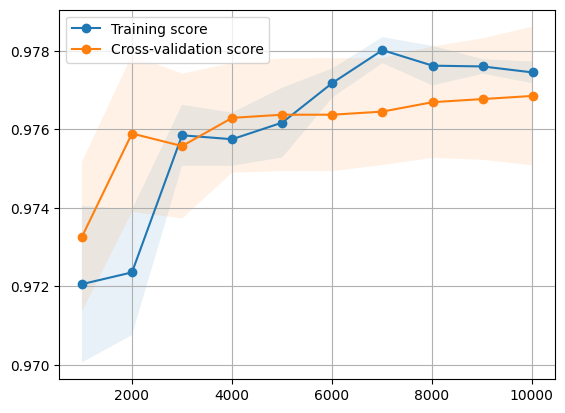

In [90]:


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_size_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_size_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(train_size_abs, train_scores_mean, marker='o', label="Training score")
plt.plot(train_size_abs, test_scores_mean, marker='o', label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [35]:
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.9808429118773946

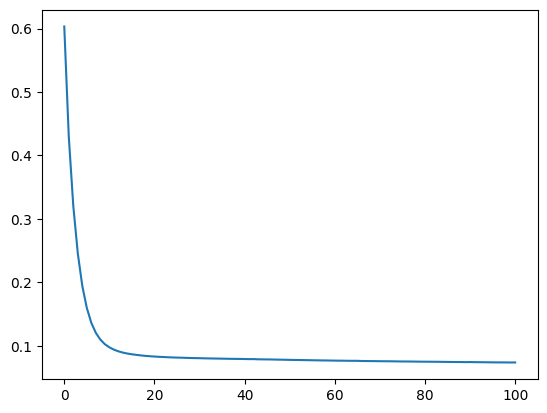

In [49]:
plt.plot(mlp.loss_curve_)

In [60]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(range(0, 101)), y=mlp.loss_curve_, name="TEST"),
    #row=1, col=1, 
)

fig.add_trace(
        go.Scatter(x=list(range(0, 101)), y=mlp.loss_curve_, name="TEST"),
    #row=1, col=2
)

fig.update_layout(height=600, width=800, xaxis_title="test")
fig.show()


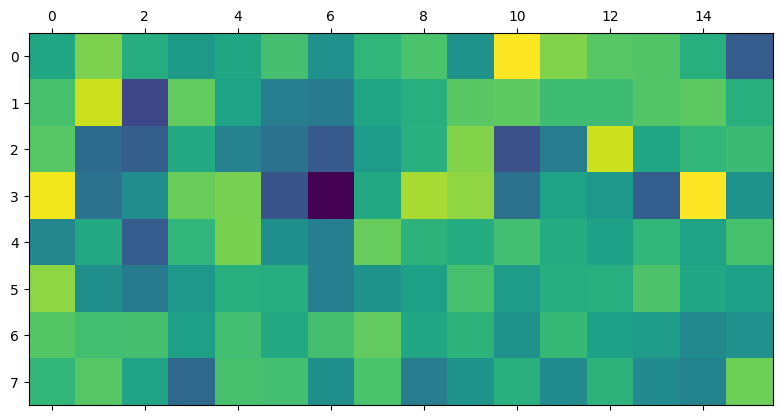

In [65]:
plt.matshow(mlp.coefs_[0])

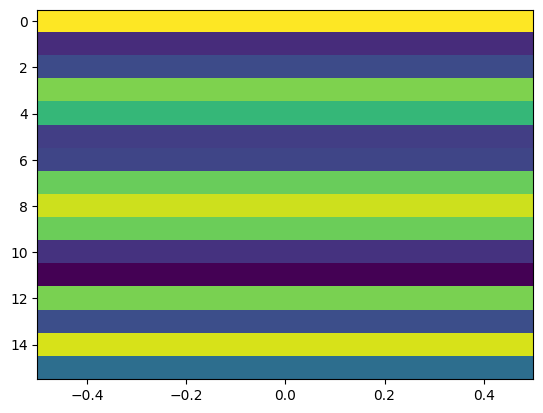

In [36]:
plt.imshow(mlp.coefs_[1], cmap='viridis', aspect='auto')

In [84]:
import plotly.express as px
import numpy as np
img = np.arange(100).reshape((10, 10))
fig = px.imshow(np.array([mlp.coefs_[0], mlp.coefs_[0]]), facet_col=0, color_continuous_scale='gray', labels={"color": "weight", "facet_col": "neural network"})
fig.update_layout(xaxis_title="Hidden Layer", yaxis_title="Input Layer")
fig.show()